In [1]:
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import misc
import collections
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
def feature_target_relationship(fname, val):
    with_disease=len(data[(data[fname] == val) & (data['target'] == 1)])
    without_disease=len(data[(data[fname] == val) & (data['target'] == 0)])
    sns.barplot(x=['With Disease','Without Disease'], y=[with_disease, without_disease])
    plt.show()
    
def print_info(fname, val):
    print("---------------------------------------------------------")
    print("Feature: " + fname)
    print("Value: ", val)

---------------------------------------------------------
Feature: sex
Value:  male


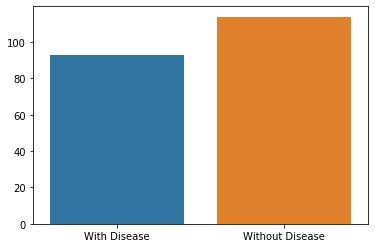

---------------------------------------------------------
Feature: sex
Value:  female


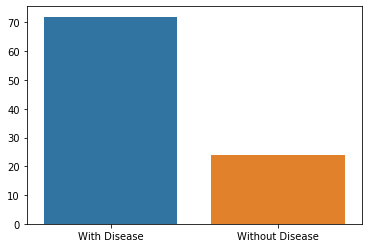

In [5]:
print_info("sex", "male")
feature_target_relationship("sex", 1)
print_info("sex", "female")
feature_target_relationship("sex", 0)

---------------------------------------------------------
Feature: Age
Value:  Young people


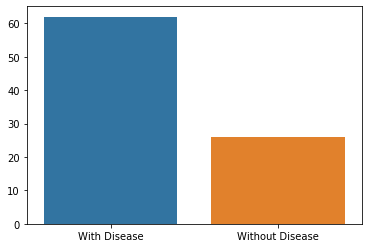

---------------------------------------------------------
Feature: Age
Value:  Elders


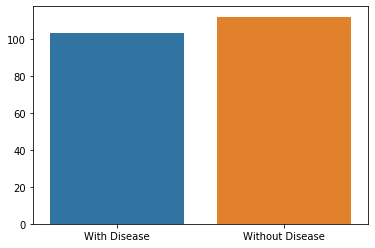

In [6]:
print_info('Age', 'Young people')
with_disease=len(data[(data['age'] < 50) & (data['target']==1)])
without_disease=len(data[(data['age'] < 50) & (data['target']==0)])
sns.barplot(x=['With Disease','Without Disease'], y=[with_disease, without_disease])
plt.show()
print_info('Age', 'Elders')
with_disease=len(data[(data['age'] >= 50) & (data['target']==1)])
without_disease=len(data[(data['age'] >= 50) & (data['target']==0)])
sns.barplot(x=['With Disease','Without Disease'], y=[with_disease, without_disease])
plt.show()

Text(0.5, 1.0, 'Sex and Age')

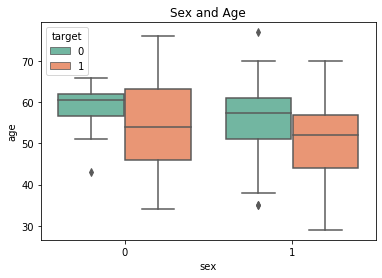

In [7]:
sns.boxplot(x='sex', y='age', data=data, hue='target', palette='Set2')
plt.title("Sex and Age")

---------------------------------------------------------
Feature: The chest pain experienced 
Value:  0


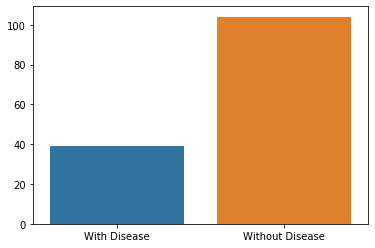

---------------------------------------------------------
Feature: The chest pain experienced 
Value:  1


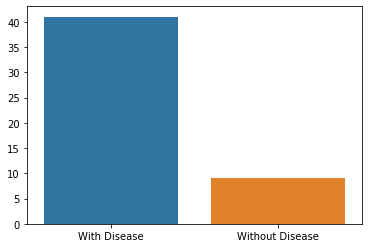

---------------------------------------------------------
Feature: The chest pain experienced 
Value:  2


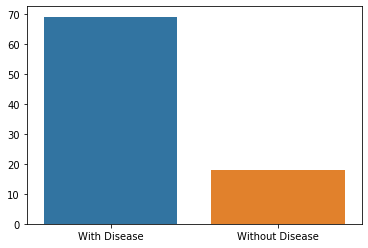

---------------------------------------------------------
Feature: The chest pain experienced 
Value:  3


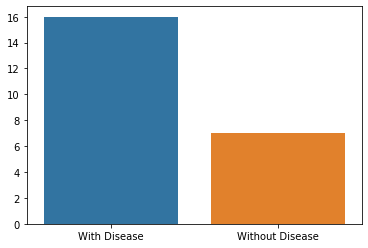

In [8]:
fname = 'The chest pain experienced '
print_info(fname, "0")
feature_target_relationship('cp', 0)
print_info(fname, "1")
feature_target_relationship("cp", 1)
print_info(fname, 2)
feature_target_relationship("cp", 2)
print_info(fname, 3)
feature_target_relationship("cp", 3)

---------------------------------------------------------
Feature: Maximum heart rate achieved
Value:  slow


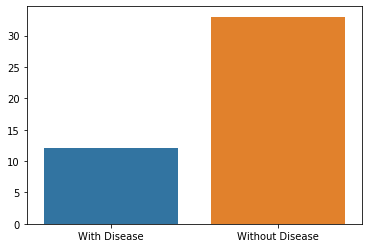

---------------------------------------------------------
Feature: Maximum heart rate achieved
Value:  fast


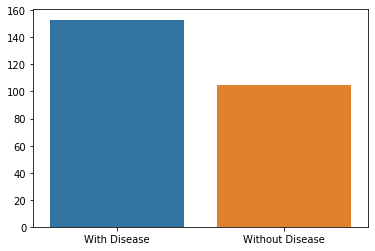

In [9]:
fname = 'Maximum heart rate achieved'
print_info(fname, 'slow')
thred = 125
with_disease=len(data[(data['thalach'] < thred) & (data['target']==1)])
without_disease=len(data[(data['thalach'] < thred) & (data['target']==0)])
sns.barplot(x=['With Disease','Without Disease'], y=[with_disease, without_disease])
plt.show()
print_info(fname, 'fast')
with_disease=len(data[(data['thalach'] >= thred) & (data['target']==1)])
without_disease=len(data[(data['thalach'] >= thred) & (data['target']==0)])
sns.barplot(x=['With Disease','Without Disease'], y=[with_disease, without_disease])
plt.show()

In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Text(0.5, 1.0, 'slope')

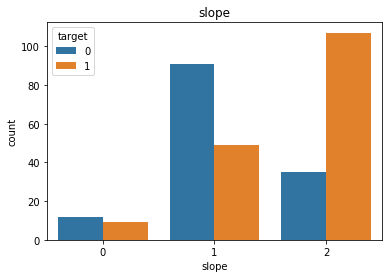

In [11]:
plot = sns.countplot(x='slope', data=data, hue='target') #,palette='plasma',linewidth=3)
plot.set_title("slope")